# Kapitel 11: Zeitreihen

McKinney, W. (2017). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython*. 2. Auflage. Sebastopol, CA [u. a.]: O’Reilly.

Überarbeitet: armin.baenziger@zhaw.ch, 2. Dezember 2021

- Zeitreihendaten sind eine wichtige Form von strukturierten Daten in vielen verschiedenen Bereichen, insb. auch in der BWL/VWL/Finance.
- Ein Merkmal, das in verschiedenen Zeitpunkten beobachtet oder gemessen wird, bildet eine Zeitreihe.
- Viele Zeitreihen haben eine konstante Frequenz, was bedeutet, dass Datenpunkte in *regelmässigen* Abständen nach einer bestimmten Regel auftreten, beispielsweise einmal pro Tag oder Monat. 
- Es gibt auch unregelmässige Zeitreihen. Beispielsweise sind die Zeiträume zwischen zwei Handelsabschlüssen typirscherweise nicht konstant.
- Der Umgang mit solchen Zeitreihendaten ist eine Stärke von Pandas.
- Das vorliegende Notebook bespricht einige zentrale Aspekte des (weiterführenden) Kapitels unseres Lehrmittels. 

In [1]:
%autosave 0

Autosave disabled


In [2]:
# Wichtige Bibliotheken mit üblichen Abkürzungen laden:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Grundlagen von Zeitreihen
- Eine grundlegende Art von Zeitreihen-Objekten in Pandas ist eine Series von Zeitstempeln, die oft ausserhalb von Pandas als Python-Strings oder Datetime-Objekten dargestellt werden.
- Pandas ist im Allgemeinen darauf ausgerichtet, mit Datum-*Arrays* zu arbeiten, die als Achsenindex oder als Spalte in einem DataFrame verwendet werden. 
- Die `to_datetime`-Methode analysiert viele verschiedene Arten von Datumsdarstellungen. Standard-Datumsformate können sehr schnell "geparst" (verstanden) werden:

In [4]:
dates_string = ['2020-1-2', '2020-1-3', '2020-1-6',
                '2020-1-7', '2020-1-8', '2020-1-9']
dates = pd.to_datetime(dates_string)
dates

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09'],
              dtype='datetime64[ns]', freq=None)

`dates` ist jetzt ein "datetime"-Objekt, welches spezielle Attribute und Methoden bietet. Z. B.:

In [5]:
dates.day    # Tag im Monat

Int64Index([2, 3, 6, 7, 8, 9], dtype='int64')

In [6]:
dates.dayofweek # Wochentag 0=Monatag, 1=Dienstag, ...

Int64Index([3, 4, 0, 1, 2, 3], dtype='int64')

In [7]:
dates.weekday   # geht auch so

Int64Index([3, 4, 0, 1, 2, 3], dtype='int64')

In [8]:
dates.day_name()

Index(['Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], dtype='object')

In [9]:
# Exkurs:
dates.dayofweek.map({0: 'Mo', 1: 'Di', 2: 'Mi',
                     3: 'Do', 4: 'Fr', 5: 'Sa', 6: 'So'})

Index(['Do', 'Fr', 'Mo', 'Di', 'Mi', 'Do'], dtype='object')

In [10]:
# Beispiel-Zeitreihe erstellen:
werte = [47, 50, 48, 55, 55, 59]
ts1 = pd.Series(werte, index=dates)
ts1

2020-01-02    47
2020-01-03    50
2020-01-06    48
2020-01-07    55
2020-01-08    55
2020-01-09    59
dtype: int64

In [11]:
ts1.index  # der Index ist ein Datetime-Objekt

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09'],
              dtype='datetime64[ns]', freq=None)

In [12]:
# Skalare aus einem DatetimeIndex sind Pandas-Timestamp-Objekte:
ts1.index[0]

Timestamp('2020-01-02 00:00:00')

Wie bei anderen Series werden arithmetische Operationen zwischen unterschiedlich indizierten Zeitreihen automatisch am Datum (Index) ausgerichtet:

In [13]:
# Zweite Zeitreihe erstellen:
werte = [39, 40, 45, 58, 47]
ts2 = pd.Series(werte, index=dates[:-1])
ts2  # Ein Wert für 2011-01-09 fehlt!

2020-01-02    39
2020-01-03    40
2020-01-06    45
2020-01-07    58
2020-01-08    47
dtype: int64

In [14]:
# Ausrichtung am Index (Datum):
ts1 + ts2

2020-01-02     86.0
2020-01-03     90.0
2020-01-06     93.0
2020-01-07    113.0
2020-01-08    102.0
2020-01-09      NaN
dtype: float64

### Indexierung, Auswahl, Subsetting

In [15]:
ts1   # zur Referenz

2020-01-02    47
2020-01-03    50
2020-01-06    48
2020-01-07    55
2020-01-08    55
2020-01-09    59
dtype: int64

In [16]:
Zeitstempel = ts1.index[1]
Zeitstempel

Timestamp('2020-01-03 00:00:00')

In [17]:
ts1[Zeitstempel]

50

Angenehm ist, dass man sogar eine **Zeichenfolge, die als Datum interpretierbar ist**, übergeben kann:

In [18]:
ts1['1/2/2020']    # US-Datumsformat (Monat/Tag/Jahr)

47

In [19]:
ts1['20200102']     # geht auch so

47

In [20]:
ts1['2020-01-02']   # aber auch so (Empfehlung)

47

Für die weiteren Ausführungen importieren wir einige längere Zeitreihen:

In [21]:
Indizes = pd.read_csv('../weitere_Daten/hspitr.csv', 
                sep=';', index_col=0, 
                parse_dates=True).sort_index()
SPI = Indizes.SPI  # Wir beginnen mit einer Series.
SPI.head()

Date
1996-01-03    2172.31
1996-01-04    2182.67
1996-01-05    2175.09
1996-01-08    2176.68
1996-01-09    2174.13
Name: SPI, dtype: float64

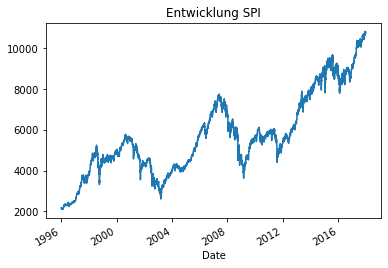

In [22]:
SPI.plot(title='Entwicklung SPI');

Es ist sehr einfach, die Daten nur eines bestimmten Jahres auszuwählen:

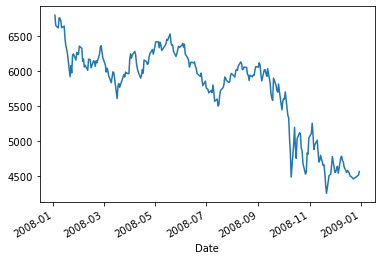

In [23]:
SPI['2008'].plot();

Hier wird der String '2007' als Jahr interpretiert und *dieser Zeitraum ausgewählt*. Dies funktioniert auch, wenn man zudem den Monat angibt:

In [24]:
SPI['2008-09']  # Indexentwicklung im September 2008

Date
2008-09-01    6054.18
2008-09-02    6116.22
2008-09-03    6082.24
2008-09-04    5946.61
2008-09-05    5857.78
2008-09-08    6015.39
2008-09-09    6017.74
2008-09-10    5964.88
2008-09-11    5922.05
2008-09-12    6033.06
2008-09-15    5826.92
2008-09-16    5676.18
2008-09-17    5609.97
2008-09-18    5580.72
2008-09-19    5898.23
2008-09-22    5795.08
2008-09-23    5723.05
2008-09-24    5697.21
2008-09-25    5812.89
2008-09-26    5709.49
2008-09-29    5445.68
2008-09-30    5563.93
Name: SPI, dtype: float64

Slicing funktioniert mit `datetime`-Objekten auch:

In [25]:
SPI['2017-12-21':]  # ab Datum bis ans Ende

Date
2017-12-21    10780.76
2017-12-22    10756.39
2017-12-27    10803.98
2017-12-28    10779.42
2017-12-29    10751.51
Name: SPI, dtype: float64

Da Zeitreihendaten chronologisch geordnet sind, kann man auch mit Zeitstempeln, *die nicht in einer Zeitreihe enthalten sind*, eine Bereichsabfrage durchführen:

In [26]:
SPI[:'1996-01-07'] 
# Am 6. und 7. Januar 1996 war die Börse geschlossen.

Date
1996-01-03    2172.31
1996-01-04    2182.67
1996-01-05    2175.09
Name: SPI, dtype: float64

Zur Erinnerung: Slicing auf diese Weise erzeugt **"Views"** auf die Quellzeitreihen (wie Slicing von NumPy-Arrays). Dies bedeutet, dass *keine Daten kopiert werden und Änderungen am Slice in den Originaldaten widergespiegelt werden*.

Die obigen Ausführungen gelten auch für DataFrames, wie die folgenden Beispiele zeigen:

In [27]:
Indizes['2001-05': '2001-05-10'] 
# Slicing funktioniert wie erwartet.

,SPI,SPI_Small_Cap,SPI_Mid_Cap,SPI_Large_Cap
Date,,,,
2001-05-02,5098.16,6291.66,5297.37,5067.56
2001-05-03,5056.15,6305.28,5276.30,5020.43
2001-05-04,5093.64,6299.47,5273.55,5065.86
2001-05-07,5160.00,6308.89,5308.49,5139.24
2001-05-08,5147.83,6300.67,5311.85,5124.35
2001-05-09,5110.60,6305.18,5295.93,5082.33
2001-05-10,5181.75,6323.23,5321.33,5162.76


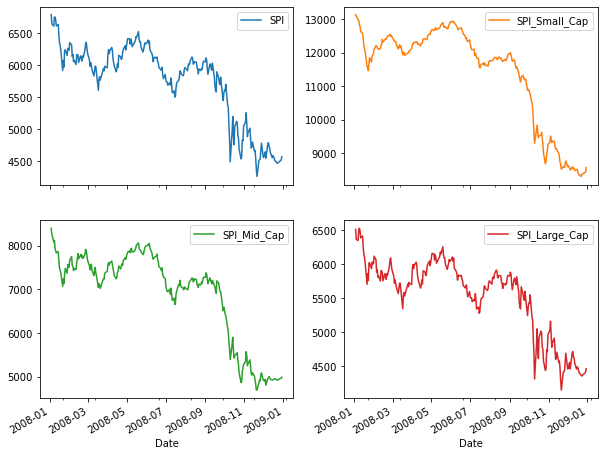

In [28]:
# Entwicklung der Indizes im Jahr 2008:
Indizes.loc['2008'].plot(subplots=True, 
                     layout=(2,2), figsize=(10,8));

**Kontrollfragen:**

In [31]:
# Gegeben:
ts3 = pd.Series([120, 114, 132, 151, 147, 175],
         index=pd.date_range(start='2020-02-27', 
                             periods=6, freq='B'))
# Die Funktion date_range wird weiter unten eingeführt.
ts3

2020-02-27    120
2020-02-28    114
2020-03-02    132
2020-03-03    151
2020-03-04    147
2020-03-05    175
Freq: B, dtype: int64

In [32]:
# Frage 1: Was ist der Output?
ts3['2020-03']

2020-03-02    132
2020-03-03    151
2020-03-04    147
2020-03-05    175
Freq: B, dtype: int64

In [33]:
# Frage 2: Was ist der Output?
ts3['2020-02-28': '2020-03-01']

2020-02-28    114
Freq: B, dtype: int64

### Zeitreihen mit mehreren Beobachtungen pro Zeitstempel
In einigen Anwendungen können mehrere Datenbeobachtungen auf einen bestimmten Zeitstempel fallen. Hier ist ein Beispiel:

In [34]:
dates = pd.to_datetime(['2020-03-02', '2020-03-03', 
                        '2020-03-03', '2020-03-04'])
ts4 = pd.Series(range(4), index=dates)
ts4

2020-03-02    0
2020-03-03    1
2020-03-03    2
2020-03-04    3
dtype: int64

In [35]:
ts4.index.is_unique
# Der (Zeit-) Index ist nicht einzigartig.
# Der 3.3.2020 existiert zweimal.

False

Die Indizierung dieser Zeitreihe erzeugt nun abhängig davon, ob ein Zeitstempel einzigartig ist oder nicht, entweder skalare Werte oder Slices:

In [36]:
ts4['2020-03-02']  # nur ein Wert

0

In [37]:
ts4['2020-03-03']  # Slice mit zwei Werten

2020-03-03    1
2020-03-03    2
dtype: int64

*Exkurs:* Angenommen man möchte die Daten mit nicht einzigartigen Zeitstempeln aggregieren. Eine Möglichkeit, dies zu tun, ist `groupby` mit dem Argument `level = 0`:

In [38]:
ts4.groupby(level=0).sum()
# Gleichbedeutend mit:
# ts4.groupby(ts3.index).sum()

2020-03-02    0
2020-03-03    3
2020-03-04    3
dtype: int64

## Datumsbereiche, Frequenzen und Verschiebungen
- Generische Zeitreihen in Pandas werden als *unregelmässig* angenommen; das heisst, sie haben keine feste Frequenz. 
- Für manche Anwendungen ist dies ausreichend. Es ist jedoch oft wünschenswert, relativ zu einer festen Frequenz zu arbeiten, beispielsweise täglich, monatlich oder alle 15 Minuten, auch wenn das bedeutet, fehlende Werte in eine Zeitreihe einzubringen. 
- Glücklicherweise verfügt Pandas über eine vollständige Palette von Standard-Zeitreihenfrequenzen und Tools für das *Resampling*, die Ableitung von Frequenzen und die Erzeugung von Bereichen mit fester Frequenz. 
- Zum Beispiel kann man die Sample-Zeitreihe in eine festgelegte tägliche Frequenz konvertieren, indem man **`resample`** aufruft:

In [39]:
# Beispieldaten:
ts1    # Werktage

2020-01-02    47
2020-01-03    50
2020-01-06    48
2020-01-07    55
2020-01-08    55
2020-01-09    59
dtype: int64

In [40]:
ts1.resample('D').sum() # der 4. und 5. erscheint jetzt auch

2020-01-02    47
2020-01-03    50
2020-01-04     0
2020-01-05     0
2020-01-06    48
2020-01-07    55
2020-01-08    55
2020-01-09    59
Freq: D, dtype: int64

- Die Zeichenkette `'D'` wird als Tagesfrequenz interpretiert. 
- Konvertierung zwischen Frequenzen oder *Resampling* ist ein wichtiges Thema, das später einen eigenen Abschnitt erhält ("Resampling und Konvertierung von Frequenzen").

### Datumsbereiche generieren
Während wir die Funktion vorher ohne Erklärung benutzt haben, ist `pandas.date_range` verantwortlich für die Erzeugung eines `DatetimeIndex` mit einer bestimmten *Frequenz*.

In [41]:
index = pd.date_range('2020-03-04', '2020-03-09')
index

DatetimeIndex(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09'],
              dtype='datetime64[ns]', freq='D')

- Standardmässig generiert `date_range` *tägliche* Zeitstempel. 
- Wenn man nur ein Start- oder Enddatum übergibt, muss man eine Anzahl von Perioden übergeben, um Folgendes zu generieren:

In [48]:
pd.date_range(start='2020-03-04', periods=6, freq='Y')
# gleich wie oben

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [45]:
pd.date_range(end='2020-03-09', periods=6)
# gleich wie oben

DatetimeIndex(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09'],
              dtype='datetime64[ns]', freq='D')

Mit dem Argument `freq` kann man die Frequenz der Zeitreihe wählen. Z. B. statt Tage (Default) Werktage:

In [49]:
indexB = pd.date_range('2020-03-04', '2020-03-09', 
              freq='B')  # B steht für Business Day
indexB

DatetimeIndex(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09'], dtype='datetime64[ns]', freq='B')

In [50]:
indexB.day_name()   # nur Werktage

Index(['Wednesday', 'Thursday', 'Friday', 'Monday'], dtype='object')

Oder wir wählen als Frequenz Wochen:

In [51]:
pd.date_range('2020-03-01', '2020-03-31', 
              freq='W-Mon')   
# Wochenfrequenz (jeweils Montag)

DatetimeIndex(['2020-03-02', '2020-03-09', '2020-03-16', '2020-03-23',
               '2020-03-30'],
              dtype='datetime64[ns]', freq='W-MON')

Wichtige Zeitreihen-Frequenzen:
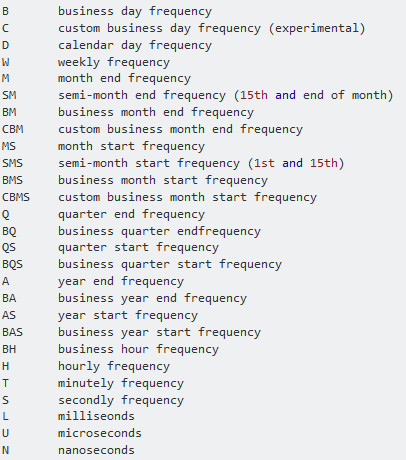

**Kontrollfragen:**

In [52]:
# Frage 1: Was ist der Output? (Im Kalender nachsehen!)
pd.date_range('2020-01-01', '2020-01-31', freq='W-Sun')

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26'], dtype='datetime64[ns]', freq='W-SUN')

In [53]:
# Frage 2: Was ist der Output (siehe Tabelle oben)?
pd.date_range('2019-01', '2020-01', freq='Q')

DatetimeIndex(['2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31'], dtype='datetime64[ns]', freq='Q-DEC')

### Shifting (Leading und Lagging) Daten
"Shifting" bezieht sich auf das zeitliche Verschieben von Daten. Sowohl Series als auch DataFrames haben eine `Shift`-Methode, um naive Verschiebungen vorwärts oder rückwärts durchzuführen, wobei der Index unverändert bleibt:

In [54]:
# Beispieldaten
spi = SPI['2017-12-20':].copy()
spi

Date
2017-12-20    10671.60
2017-12-21    10780.76
2017-12-22    10756.39
2017-12-27    10803.98
2017-12-28    10779.42
2017-12-29    10751.51
Name: SPI, dtype: float64

In [55]:
spi.shift(1)

Date
2017-12-20         NaN
2017-12-21    10671.60
2017-12-22    10780.76
2017-12-27    10756.39
2017-12-28    10803.98
2017-12-29    10779.42
Name: SPI, dtype: float64

In [56]:
spi.shift(-1)

Date
2017-12-20    10780.76
2017-12-21    10756.39
2017-12-22    10803.98
2017-12-27    10779.42
2017-12-28    10751.51
2017-12-29         NaN
Name: SPI, dtype: float64

In [57]:
# Veränderungsraten (hier Tagesrenditen):
spi / spi.shift(1) - 1

Date
2017-12-20         NaN
2017-12-21    0.010229
2017-12-22   -0.002261
2017-12-27    0.004424
2017-12-28   -0.002273
2017-12-29   -0.002589
Name: SPI, dtype: float64

Einfacher kann man prozentuale Veränderungen mit der Methode `pct_change` berechnen:

In [58]:
spi.pct_change()

Date
2017-12-20         NaN
2017-12-21    0.010229
2017-12-22   -0.002261
2017-12-27    0.004424
2017-12-28   -0.002273
2017-12-29   -0.002589
Name: SPI, dtype: float64

In [59]:
# Fehlwert beseitigen:
spi.pct_change().dropna()

Date
2017-12-21    0.010229
2017-12-22   -0.002261
2017-12-27    0.004424
2017-12-28   -0.002273
2017-12-29   -0.002589
Name: SPI, dtype: float64

## Resampling und Konvertieren von Frequenzen
- *Resampling* bezieht sich auf den Prozess der Umwandlung einer Zeitreihe von einer Frequenz in eine andere.
- Das Aggregieren von Daten höherer Frequenz zu niedrigerer Frequenz wird *Downsampling* genannt, während das Konvertieren von niedriger Frequenz zu höherer Frequenz *Upsampling* genannt wird. 
- Die Konvertierung von beispielsweise `W-WED` (wöchentlich am Mittwoch) zu `W-FRI` ist weder Upsampling noch Downsampling. 
- **Pandas-Objekte sind mit einer `resample`-Methode ausgestattet, *die die zentrale Methode für alle Frequenzumwandlungen ist.***
- `resample` hat eine ähnliche API wie `groupby`: Man ruft zuerst `resample` auf, um die Daten zu gruppieren und ruft dann eine Aggregationsfunktion auf.

### Downsampling

In [88]:
# Ausgangslage:
spi = SPI['2017'].copy()
spi.head()

Date
2017-01-03    9061.16
2017-01-04    9102.46
2017-01-05    9142.16
2017-01-06    9166.05
2017-01-09    9175.24
Name: SPI, dtype: float64

Wir welchsen nun von Tages- auf Monatsendwerte:

In [89]:
# Monatstotale:
spi.resample('M').last()
# Mit last() kriegen wir die Endwerte pro Monat (M).

Date
2017-01-31     9063.32
2017-02-28     9367.08
2017-03-31     9637.82
2017-04-30     9976.11
2017-05-31    10248.87
2017-06-30    10128.34
2017-07-31    10310.53
2017-08-31    10177.22
2017-09-30    10447.33
2017-10-31    10604.40
2017-11-30    10674.94
2017-12-31    10751.51
Freq: M, Name: SPI, dtype: float64

Als nächstes bilden wir *stetige* Tagesrenditen (welche *additiv* sind). Bei Tagesrenditen unterscheiden sich diese allerdings nur sehr geringfügig von den diskreten Renditen (mit `pct_change`).

In [90]:
r = np.log(spi/spi.shift(1))
r.head()

Date
2017-01-03         NaN
2017-01-04    0.004548
2017-01-05    0.004352
2017-01-06    0.002610
2017-01-09    0.001002
Name: SPI, dtype: float64

Aus den stetigen Tagesrenditen kann man sehr einfach Monats- oder Quartalsrenditen (oder andere Periodenrenditen mit tieferer Frequenz) bilden:

In [91]:
r.resample('Q').sum()  # stetige Renditen sind additiv!

Date
2017-03-31    0.061698
2017-06-30    0.049642
2017-09-30    0.031009
2017-12-31    0.028700
Freq: Q-DEC, Name: SPI, dtype: float64

Dies sind die Quartalsrenditen, welche man statt mit einem Timestamp (Default) besser mit der Periode kennzeichnet:

In [92]:
r.resample('Q', kind='period').sum()

Date
2017Q1    0.061698
2017Q2    0.049642
2017Q3    0.031009
2017Q4    0.028700
Freq: Q-DEC, Name: SPI, dtype: float64

**Kontrollfragen:**

In [93]:
# Gegeben:
spi_M = spi.resample('M').last()
spi_M

Date
2017-01-31     9063.32
2017-02-28     9367.08
2017-03-31     9637.82
2017-04-30     9976.11
2017-05-31    10248.87
2017-06-30    10128.34
2017-07-31    10310.53
2017-08-31    10177.22
2017-09-30    10447.33
2017-10-31    10604.40
2017-11-30    10674.94
2017-12-31    10751.51
Freq: M, Name: SPI, dtype: float64

In [94]:
# Frage 1: Was ist der Output?
spi_M['2017-05']

Date
2017-05-31    10248.87
Freq: M, Name: SPI, dtype: float64

In [95]:
# Frage 2: Was ist der Output?
spi_M.resample('Q').last()

Date
2017-03-31     9637.82
2017-06-30    10128.34
2017-09-30    10447.33
2017-12-31    10751.51
Freq: Q-DEC, Name: SPI, dtype: float64

***
#### *Exkurs für die Finance-Interessierten:* Open-High-Low-Close (OHLC) Resampling
- In der Finance besteht eine beliebte Methode zum Aggregieren einer Zeitreihe darin, vier Werte für jeden Bucket zu berechnen: die ersten (open), letzten (close), maximalen (high) und minimalen (low) Werte. 
- Durch Verwendung der `ohlc`-Aggregatfunktion erhält man effizient ein DataFrame mit Spalten, die diese vier Aggregate enthalten.

In [96]:
# Wochen "open-high-low-close" vom SPI:
SPI.resample('W-FRI').ohlc().tail()

,open,high,low,close
Date,,,,
2017-12-01,10624.71,10687.38,10618.31,10618.31
2017-12-08,10684.88,10690.20,10632.63,10690.20
2017-12-15,10675.25,10752.01,10675.25,10748.35
2017-12-22,10811.74,10811.74,10671.60,10756.39
2017-12-29,10803.98,10803.98,10751.51,10751.51


*Ende des Exkurses*
***

## "Moving-Window"-Funktionen
- Eine wichtige Klasse von Array-Transformationen, die für Zeitreihenoperationen verwendet werden, sind Statistiken und andere Funktionen, die über ein *gleitendes Fenster oder mit exponentiell abfallenden Gewichtungen ausgewertet werden*. 
- Dies kann nützlich sein, um *verrauschte* oder fehlerhafte Daten zu glätten. 
- Wes McKinney nennt diese **"Moving-Window-Funktionen"**, obwohl sie Funktionen ohne ein Fenster fester Länge enthalten (wie exponentiell gewichtete gleitende Durchschnitte). 
- Wie andere statistische Funktionen *schliessen diese auch fehlende Daten automatisch aus*. 
- Wir beginnen mit einem einfachen Beispiel:

In [97]:
# Datenbeispiel:
ts3

2020-02-27    120
2020-02-28    114
2020-03-02    132
2020-03-03    151
2020-03-04    147
2020-03-05    175
Freq: B, dtype: int64

- Wir führen nun den `rolling`-Operator ein, der sich ähnlich verhält wie `resample` und `groupby`. 
- Er kann zusammen mit einem `window` bei einer Series oder einem DataFrame aufgerufen werden.
- Beispiel: Der (nicht zentrierte) gleitende Durchschnitt 3. Ordnung von `ts3`:

In [98]:
ts3.rolling(3).mean().round(1)

2020-02-27      NaN
2020-02-28      NaN
2020-03-02    122.0
2020-03-03    132.3
2020-03-04    143.3
2020-03-05    157.7
Freq: B, dtype: float64

- Aus den ersten drei Werten ergibt sich der Mittelwert von (120 + 114 + 132) / 3 = 122. Aus den nächsten drei Werten ergibt sich der Mittelwert (114 + 132 + 151) / 3 = 132.3 usw. 
- Oft möchte man den gleitenden Durchschnitt zentrieren. Dies geht mit dem Argument `center=True`:

In [99]:
ts3.rolling(3, center=True).mean()

2020-02-27           NaN
2020-02-28    122.000000
2020-03-02    132.333333
2020-03-03    143.333333
2020-03-04    157.666667
2020-03-05           NaN
Freq: B, dtype: float64

Wir betrachten nun ein Beispiel mit realen Daten:

In [100]:
spi = SPI['2007':'2009'].copy()
spi.head()

Date
2007-01-03    7032.74
2007-01-04    7033.63
2007-01-05    7015.51
2007-01-08    6983.72
2007-01-09    7006.67
Name: SPI, dtype: float64

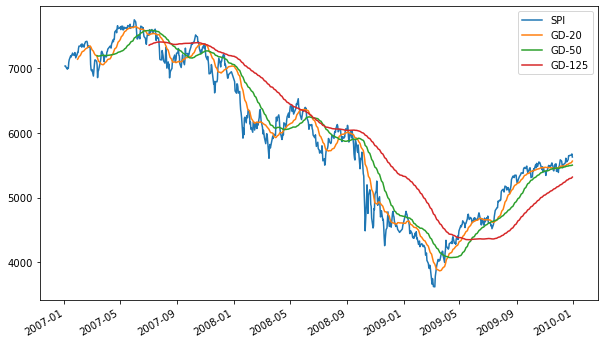

In [105]:
# Gleitender 125-Handelstage-Durchschnitt 
# (entspricht etwa einem halben Jahr)
spi.plot()
spi.rolling(20).mean().plot(figsize=(10,6))
spi.rolling(50).mean().plot(figsize=(10,6))
spi.rolling(125).mean().plot(figsize=(10,6))
plt.xlabel('')
plt.legend(['SPI', 'GD-20','GD-50' ,'GD-125']);

Man sieht, dass der gleitende Durchschnitt nicht "zentriert" ist. Er hinkt der Entwicklung der ungefilterten Zeitreihe hinterher (z. B. steigt der SPI ab ca. 2009-03 wieder stark an, während der GD erst verspätet ansteigt).

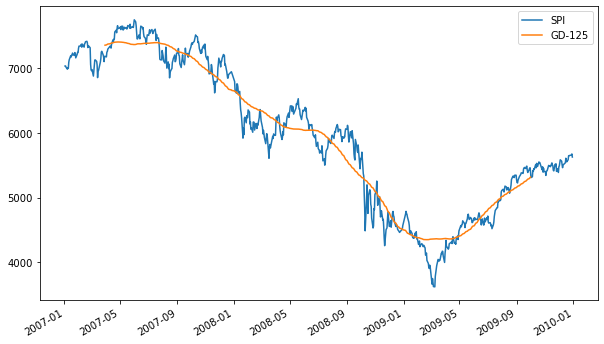

In [106]:
# ZENTRIERTER gleitender 125-Tage-Durchschnitt:
spi.plot()
spi.rolling(125, center=True).mean().plot(figsize=(10,6))
plt.xlabel('')
plt.legend(['SPI', 'GD-125']);

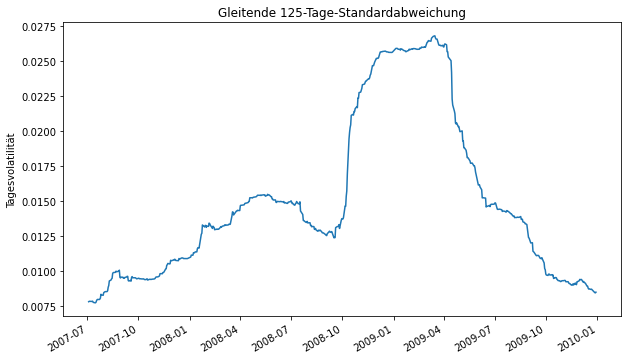

In [107]:
# Gleitende 125-Tage-Standardabweichung:
spi_r = spi.pct_change()
spi_r.rolling(125).std().plot(
    title='Gleitende 125-Tage-Standardabweichung',
    figsize=(10,6))
plt.xlabel('')
plt.ylabel('Tagesvolatilität');

Die Volatilität (Standardabweichung der Renditen) hat in der Finanzkrise stark zugenommen und danach ist sie wieder auf tiefes Niveau gefallen.

- Hinweis: Der entsprechende Plot im Lehrmittel ist problematisch, da er die Standardabweichung der Preise (statt Renditen) darstellt. Man sollte von sog. nicht stationären Zeitreihen (insb. Zeitreihen mit einem Trend) keine Standardabweichung rechnen.
- Durch den Aufruf einer Moving-Window-Funktion auf ein *DataFrame* wird die Transformation *auf jede Spalte* angewendet.

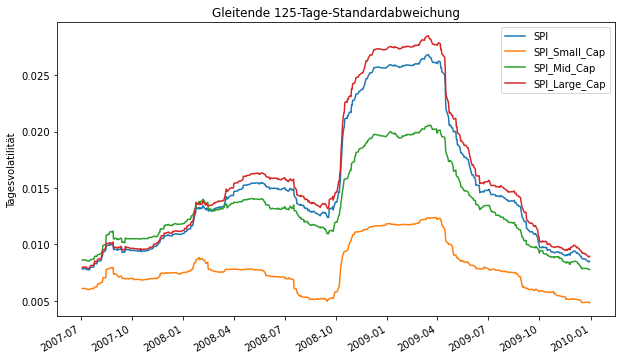

In [108]:
Renditen = Indizes['2007': '2009'].pct_change()
Renditen.rolling(125).std().plot(figsize=(10,6),
                title='Gleitende 125-Tage-Standardabweichung')
plt.xlabel('')
plt.ylabel('Tagesvolatilität');

**Kontrollfragen:**

In [109]:
# Gegeben:
ts5 = pd.Series([2,1,3,5,4,6], index=ts3.index)
ts5

2020-02-27    2
2020-02-28    1
2020-03-02    3
2020-03-03    5
2020-03-04    4
2020-03-05    6
Freq: B, dtype: int64

In [110]:
# Frage 1: Was ist der Output?
ts5.rolling(3, center=True).mean()

2020-02-27    NaN
2020-02-28    2.0
2020-03-02    3.0
2020-03-03    4.0
2020-03-04    5.0
2020-03-05    NaN
Freq: B, dtype: float64

In [111]:
# Frage 2: Was ist der Output?
ts5.rolling(3, center=True).max()

2020-02-27    NaN
2020-02-28    3.0
2020-03-02    5.0
2020-03-03    5.0
2020-03-04    6.0
2020-03-05    NaN
Freq: B, dtype: float64

## Fazit
- Zeitreihendaten erfordern andere Arten von Analyse- und Datenumwandlungstools als die anderen Arten von Daten, die wir in den vorherigen Kapiteln untersucht haben. 
- Pandas ist sehr mächtig im Umgang mit Zeitreihendaten und wir haben wichtige Funktioalitäten kennengelernt.
- Wir haben nun die wichtigsten Grundlagen von Pandas besprochen. Im letzten Teil des Kurses werden wir noch einen oder zwei grössere Datensätze mit den vorgestellten Funktionalitäten von Pandas analysieren.